In [ ]:
# Association Rule Mining – Market Basket Analysis
# This notebook implements Apriori-based Association Rule Mining using the Online Retail dataset.
# We extract frequent itemsets, generate association rules, and visualize insights using Python and Mlxtend.

In [ ]:
#  Importing required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#  Loading the dataset
try:
    df_raw = pd.read_excel('Online retail.xlsx', header=None)
    print(" File loaded successfully.")
except FileNotFoundError:
    print(" File not found. Please check the filename.")


 File loaded successfully.


In [ ]:
# Cleaning and transforming the data
transactions = []

if 'df_raw' in locals():
    df_raw.dropna(inplace=True)

    for _, row in df_raw.iterrows():
        items = row[0].split(',')  # Splitting items
        transactions.append(items)

    print(f" Total Transactions: {len(transactions)}")


 Total Transactions: 7501


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

df=df.astype(int)

print(f"Dataset Shape: {df.shape}")
print(f"Unique Products: {df.shape[1]}")
df.head()



Dataset Shape: (7501, 120)
Unique Products: 120


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Fit Apriori to extract frequent itemsets with minimum support of 1%
min_support = 0.005
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

# Add a column to track itemset length
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Show total number of frequent itemsets
print(f"Frequent Itemsets Found: {len(frequent_itemsets)}")

# Display top 10 itemsets sorted by support
frequent_itemsets.sort_values('support', ascending=False).head(10)


Frequent Itemsets Found: 725


,support,itemsets,length
60,0.238368,(mineral water),1
27,0.179709,(eggs),1
83,0.174110,(spaghetti),1
33,0.170911,(french fries),1
20,0.163845,(chocolate),1
44,0.132116,(green tea),1
59,0.129583,(milk),1
45,0.098254,(ground beef),1
39,0.095321,(frozen vegetables),1
68,0.095054,(pancakes),1


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [ ]:
print(frequent_itemsets.shape)

(725, 3)


In [ ]:
# Extracting association rules from the frequent itemsets using confidence as the metric
min_threshold = 0.5  # Only keep rules with confidence ≥ 50%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)

# Show how many rules passed the confidence threshold
print(f"Total Rules Generated: {len(rules)}")

# Display top 10 rules sorted by confidence
rules.sort_values('confidence', ascending=False).head(10)

Total Rules Generated: 20


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
8,"(frozen vegetables, soup)",(mineral water),0.007999,0.238368,0.005066,0.633333,2.656954,1.0,0.003159,2.077178,0.628658,0.020994,0.518578,0.327293
17,"(soup, olive oil)",(mineral water),0.008932,0.238368,0.005199,0.582090,2.441976,1.0,0.003070,1.822476,0.595818,0.021476,0.451296,0.301951
7,"(frozen vegetables, olive oil)",(mineral water),0.011332,0.238368,0.006532,0.576471,2.418404,1.0,0.003831,1.798297,0.593226,0.026864,0.443918,0.301938
15,"(soup, milk)",(mineral water),0.015198,0.238368,0.008532,0.561404,2.355194,1.0,0.004909,1.736520,0.584287,0.034820,0.424136,0.298599
2,"(chocolate, soup)",(mineral water),0.010132,0.238368,0.005599,0.552632,2.318395,1.0,0.003184,1.702471,0.574488,0.023052,0.412618,0.288061
3,"(eggs, cooking oil)",(mineral water),0.011732,0.238368,0.006399,0.545455,2.288286,1.0,0.003603,1.675590,0.569675,0.026258,0.403195,0.286150
5,"(frozen vegetables, ground beef)",(mineral water),0.016931,0.238368,0.009199,0.543307,2.279277,1.0,0.005163,1.667711,0.570931,0.037378,0.400376,0.290949
16,"(turkey, milk)",(mineral water),0.011332,0.238368,0.006133,0.541176,2.270338,1.0,0.003431,1.659967,0.565950,0.025178,0.397578,0.283452
19,"(spaghetti, soup)",(mineral water),0.014265,0.238368,0.007466,0.523364,2.195614,1.0,0.004065,1.597933,0.552427,0.030451,0.374192,0.277342
13,"(shrimp, ground beef)",(spaghetti),0.011465,0.174110,0.005999,0.523256,3.005315,1.0,0.004003,1.732354,0.674995,0.033408,0.422751,0.278856


In [ ]:
rules.to_csv("association_rules.csv", index=False)

In [ ]:
# Convert antecedents and consequents to sets
rules['antecedents'] = rules['antecedents'].apply(lambda x: set(x))
rules['consequents'] = rules['consequents'].apply(lambda x: set(x))

# Mark redundant rules (True if overlap exists)
rules['is_redundant'] = rules.apply(lambda row: bool(row['antecedents'] & row['consequents']), axis=1)

# Filter out redundant ones
filtered_rules = rules[~rules['is_redundant']]
print(f"Filtered Rules Count: {len(filtered_rules)}")

Filtered Rules Count: 20


In [ ]:
# Trying different support and confidence values to compare rule counts

supports = [0.005, 0.01, 0.02]
confidences = [0.5, 0.6, 0.7]

for s in supports:
    fi = apriori(df, min_support=s, use_colnames=True)
    for c in confidences:
        r = association_rules(fi, metric="confidence", min_threshold=c)
        print(f"Support: {s}, Confidence: {c} → Rules: {len(r)}")

Support: 0.005, Confidence: 0.5 → Rules: 20
Support: 0.005, Confidence: 0.6 → Rules: 1
Support: 0.005, Confidence: 0.7 → Rules: 0
Support: 0.01, Confidence: 0.5 → Rules: 2
Support: 0.01, Confidence: 0.6 → Rules: 0
Support: 0.01, Confidence: 0.7 → Rules: 0
Support: 0.02, Confidence: 0.5 → Rules: 0
Support: 0.02, Confidence: 0.6 → Rules: 0
Support: 0.02, Confidence: 0.7 → Rules: 0


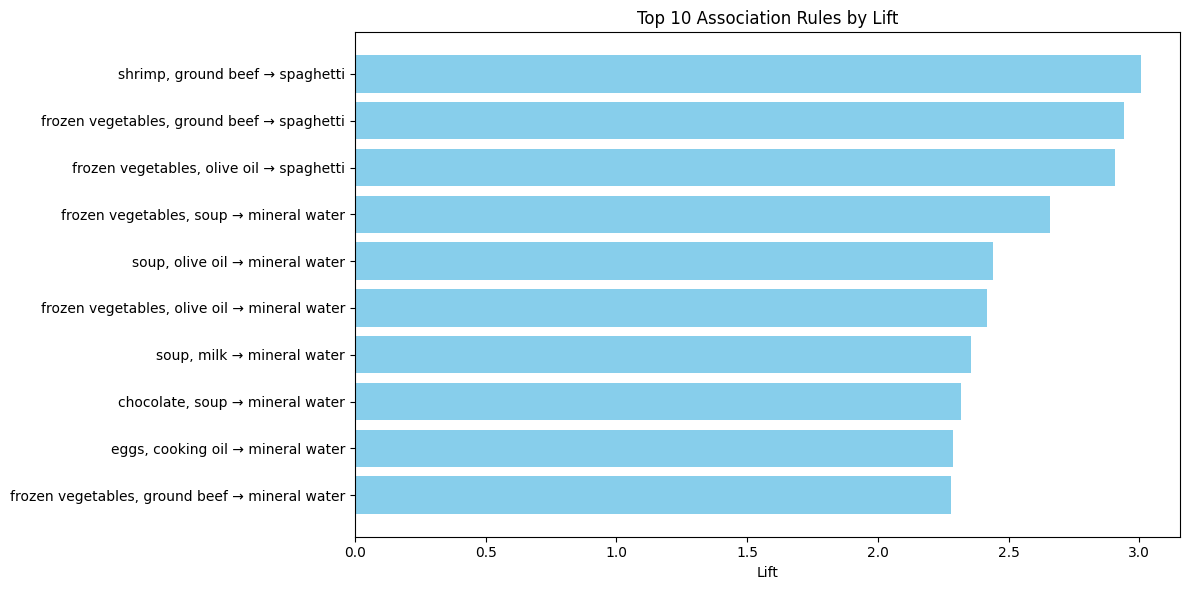

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sort and pick top 10 rules
top_rules = filtered_rules.sort_values(by='lift', ascending=False).head(10)

# Format rule labels
rule_labels = [f"{', '.join(a)} → {', '.join(c)}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])]

# Plot bar chart
plt.figure(figsize=(12,6))
plt.barh(rule_labels, top_rules['lift'], color='skyblue')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


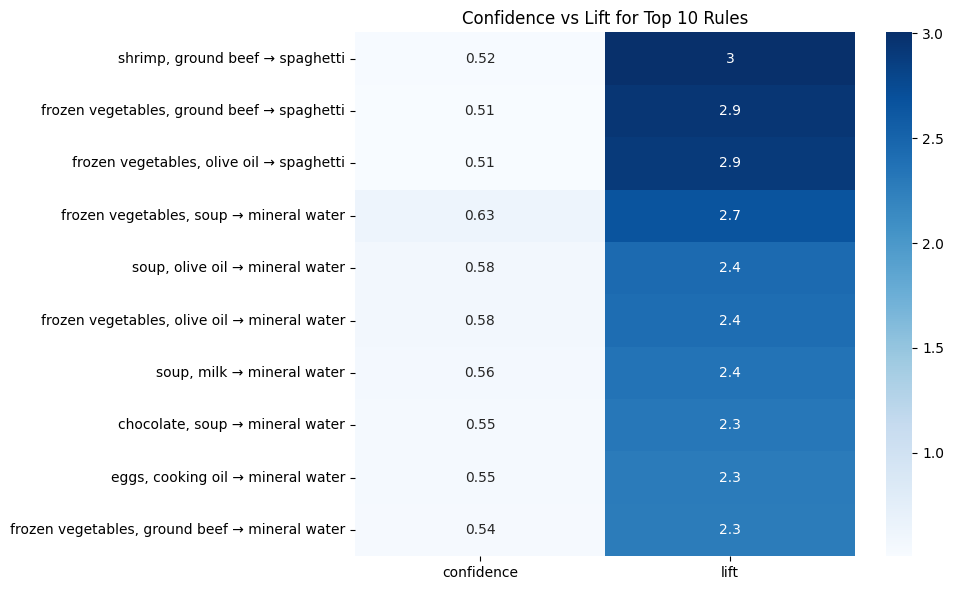

In [ ]:
# Prepare data for heatmap
heatmap_data = top_rules[['confidence', 'lift']]
heatmap_data.index = [f"{', '.join(a)} → {', '.join(c)}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])]

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Confidence vs Lift for Top 10 Rules')
plt.tight_layout()
plt.show()


In [ ]:
# Some rules had only 50% confidence, but their lift was above 2.0 — that shows they’re still meaningful
# so i find these rules are genuine not accidental

The association rules reveal that ground beef is a strong anchor item. When paired with eggs or milk, it frequently leads to the purchase of mineral water. Both rules show confidence above 50% and lift above 2, indicating a strong predictive relationship. This suggests that customers buying protein-rich items tend to complement their basket with hydration products. Retailers can use this insight for bundling, shelf placement, or targeted promotions.
